<a href="https://colab.research.google.com/github/tk231/DSBio2020/blob/main/DSBio_Ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extended Lotka-Volterra system

We extend the Lotka-Volterra system as such:

\begin{align}
  \dot{x}(t) &= a \cdot x(t) \cdot \Big(1 - \frac{x(t)}{K} \Big) - b \cdot \frac{x(t)}{x(t) + S} \cdot y(t) \\
  \dot{y}(t) &= c \cdot \frac{x(t)}{x(t) + S} \cdot y(t) - d \cdot y(t)
\end{align}

And have two positive parameters, $K$ and $S$.

a) Repeat Exercise 1 for the extended system using the parameter values $a=b=c=1$; $d =1/3$; $K =30$; $S=10$ and two sets of initial values $x_1(t = 0)$; $y_1(t = 0) = (1,1)$ and $x_2(t = 0);y_2(t = 0) = (10,10)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def eulerLV_ext(init, pars, dt, tmax, pars_ext):
  """
  Function to calculate the extended Lotka-Voltera equations via use of the Euler method

  Parameters:
  -----------
  """
  times = np.arange(0, tmax + dt, dt)
  stop = len(times)

  x = [init[0]]
  y = [init[1]]

  for step in np.arange(0, stop-1, 1):
    fx = (pars[0] * x[step] * (1 - (x[step] / pars_ext[0]))) - ((pars[1] * x[step] * y[step]) / (x[step] + pars_ext[1]))
    fy = ((pars[2] * x[step] * y[step]) / (x[step] + pars_ext[1])) - (pars[3] * y[step])
    x.append(x[step] + (fx * dt))
    y.append(y[step] + (fy * dt))

  return times, x, y

In [ ]:
pars = [1, 1, 1, 1/3]
pars_ext = [30, 10]

init1 = [1, 1]
init2 = [10, 10]

dt = 0.1
tmax = 50

t1, prey1, predator1 = eulerLV_ext(init1, pars, dt, tmax, pars_ext)
t2, prey2, predator2 = eulerLV_ext(init2, pars, dt, tmax, pars_ext)

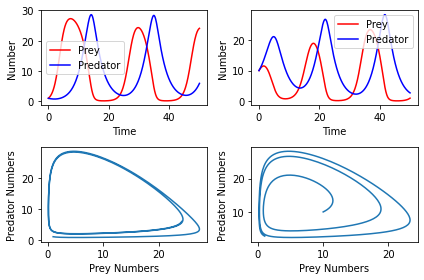

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(t1, prey1, 'r', label='Prey')
axs[0,0].plot(t1, predator1, 'b', label='Predator')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Number')
axs[0,0].legend()

axs[0,1].plot(t2, prey2, 'r', label='Prey')
axs[0,1].plot(t2, predator2, 'b', label='Predator')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Number')
axs[0,1].legend()

axs[1,0].plot(prey1, predator1, label='Phase Space')
axs[1,0].set_xlabel('Prey Numbers')
axs[1,0].set_ylabel('Predator Numbers')

axs[1,1].plot(prey2, predator2, label='Phase Space')
axs[1,1].set_xlabel('Prey Numbers')
axs[1,1].set_ylabel('Predator Numbers')

plt.tight_layout()
plt.show()

Adding noise to the system:

In [ ]:
def eulerLV_ext_noise(init, pars, dt, tmax, sd, pars_ext):
  """
  Function to calculate the extended Lotka-Voltera equations with noise via use of the Euler method

  Parameters:
  -----------
  """
  times = np.arange(0, tmax + dt, dt)
  stop = len(times)

  x = [init[0]]
  y = [init[1]]

  for step in np.arange(0, stop - 1, 1):
    eps = np.random.default_rng().normal(loc=0, scale=sd)

    fx = (pars[0] * x[step] * (1 - (x[step] / pars_ext[0]))) - ((pars[1] * x[step] * y[step]) / (x[step] + pars_ext[1]))
    fy = ((pars[2] * x[step] * y[step]) / (x[step] + pars_ext[1])) - (pars[3] * y[step])

    x_temp = x[step] + (fx * dt) + (np.sqrt(dt) * eps)
    y_temp = y[step] + (fy * dt) + (np.sqrt(dt) * eps)

    if x_temp < 0:
      x.append(0)
      y.append(y_temp)
    elif y_temp < 0:
      x.append(x_temp)
      y.append(0)
    else:
      x.append(x_temp)
      y.append(y_temp)

  return times, x, y

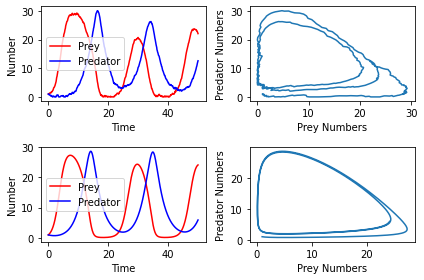

In [ ]:
sd = 0.5

t_noise, prey_noise, predator_noise = eulerLV_ext_noise(init1, pars, dt, tmax, sd, pars_ext)
t_nonoise, prey_nonoise, predator_nonoise = eulerLV_ext(init1, pars, dt, tmax, pars_ext)

fig_noise, axs_noise = plt.subplots(2, 2)
axs_noise[0,0].plot(t_noise, prey_noise, 'r', label='Prey')
axs_noise[0,0].plot(t_noise, predator_noise, 'b', label='Predator')
axs_noise[0,0].set_xlabel('Time')
axs_noise[0,0].set_ylabel('Number')
axs_noise[0,0].legend()

axs_noise[0,1].plot(prey_noise, predator_noise, label='Phase Space')
axs_noise[0,1].set_xlabel('Prey Numbers')
axs_noise[0,1].set_ylabel('Predator Numbers')

axs_noise[1,0].plot(t_nonoise, prey_nonoise, 'r', label='Prey')
axs_noise[1,0].plot(t_nonoise, predator_nonoise, 'b', label='Predator')
axs_noise[1,0].set_xlabel('Time')
axs_noise[1,0].set_ylabel('Number')
axs_noise[1,0].legend()

axs_noise[1,1].plot(prey_nonoise, predator_nonoise, label='Phase Space')
axs_noise[1,1].set_xlabel('Prey Numbers')
axs_noise[1,1].set_ylabel('Predator Numbers')

plt.tight_layout()
plt.show()